<a href="https://colab.research.google.com/github/Mrezakhodashenas/PhD-NN/blob/main/Siena_Scalp_EEG_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%reset -f

In [2]:
!pip install import_ipynb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.4 MB/s eta 0:00:00


In [3]:
# # 1. Learning how spiking neurons are implemented as a recurrent network
# # 2. Understanding backpropagation through time, and the associated challenges in SNNs such as the non-differentiability of spikes
# # 3. Training a fully-connected network on the static MNIST dataset

!pip install snntorch


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.2/76.2 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylin

In [4]:
!pip install gym


In [5]:
!pip install Graphviz

In [6]:
!pip install mne


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 17.8 MB/s eta 0:00:00


In [7]:
!pip install --upgrade mne


In [8]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=ce2056b208a0804dd80a5a6a2e428737dec081c5314cdce312e9482bc9308f61
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [13]:
!pip install pyEDFlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 12.8 MB/s eta 0:00:00


In [66]:
import pickle
import os
import sys
import time
import datetime
import json
import random
import snntorch as snn
from snntorch import spikeplot as splt
from snntorch import spikegen

import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

import matplotlib.pyplot as plt
import numpy as np
import itertools
import math

from torchvision import utils as utls
from snntorch import utils

from snntorch._neurons.alpha import Alpha

from IPython.display import HTML

import torch.optim as optim
import gym
# SOURCE CODE FOR SNNTORCH._NEURONS.LEAKY

from snntorch._neurons import LIF
import torch
from torch import nn
import import_ipynb

import mne
import wget
from scipy.signal import find_peaks


In [12]:
from google.colab import files

uploaded = files.upload()

# # -------------------------------------------------
# # URL to download the EDF file from PhysioNet
# url = 'https://physionet.org/content/siena-scalp-eeg/1.0.0/PN00/PN00-1.edf'

# # Destination path to save the downloaded file
# dest_path = 'PN00-1.edf'

# # Download the file
# wget.download(url, dest_path)


Saving PN00-1.edf to PN00-1.edf


In [14]:

import mne

# Specify the file path
file_path = '/content/PN00-1.edf'

# Read the EDF file
raw = mne.io.read_raw_edf(file_path, preload=True)

Extracting EDF parameters from /content/PN00-1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1343999  =      0.000 ...  2624.998 secs...
<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


In [15]:
# Print the raw data information
print(raw.info)

<Info | 8 non-empty values
 bads: []
 ch_names: EEG Fp1, EEG F3, EEG C3, EEG P3, EEG O1, EEG F7, EEG T3, EEG T5, ...
 chs: 35 EEG
 custom_ref_applied: False
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 35
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>


In [136]:
# Convert time in seconds to sample indices
start_sample = int(0 * raw.info['sfreq'])  # Replace 0 with the start time in seconds
end_sample = int(200 * raw.info['sfreq'])   # Replace 200 with the end time in seconds

# Slice the raw data
eeg_data, times = raw[:, start_sample:end_sample]


# eeg_data, times = raw[:20*raw.info['sfreq']]  # Get the first 20 seconds of EEG data


In [41]:
print('\neeg_data.shape: ', eeg_data.shape)           # eeg_data.shape:  (35, 102400)
print('\neeg_data[0,:].shape: ', eeg_data[0,:].shape) # eeg_data[0,:].shape:  (102400,)
print('\neeg_data.T shape: ', eeg_data.T.shape)       # eeg_data.T shape:  (102400, 35)
print('\neeg_data.T[:,0:1] shape: ', eeg_data.T[:,0:1].shape)     # eeg_data.T[:,0:1] shape:  (102400, 1)

print('\ntimes.shape: ', times.shape)                 # times.shape:  (102400,)


eeg_data.shape:  (35, 102400)

eeg_data[0,:].shape:  (102400,)

eeg_data.T shape:  (102400, 35)

eeg_data.T[:,0:1] shape:  (102400, 1)

times.shape:  (102400,)


In [42]:
import pandas as pd

# Load CSV file
csv_file_path = '/content/subject_info.csv'
subject_info_df = pd.read_csv(csv_file_path)

# Display the loaded data
print(subject_info_df)


   patient_id   age_years  gender  seizure  localization  lateralization  \
0        PN00          55    Male      IAS             T               R   
1        PN01          46    Male      IAS             T               L   
2        PN03          54    Male      IAS             T               R   
3        PN05          51  Female      IAS             T               L   
4        PN06          36    Male      IAS             T               L   
5        PN07          20  Female      IAS             T               L   
6        PN09          27  Female      IAS             T               L   
7        PN10          25    Male     FBTC             F       Bilateral   
8        PN11          58  Female      IAS             T               R   
9        PN12          71    Male      IAS             T               L   
10       PN13          34  Female      IAS             T               L   
11       PN14          49    Male     WIAS             T               L   
12       PN1

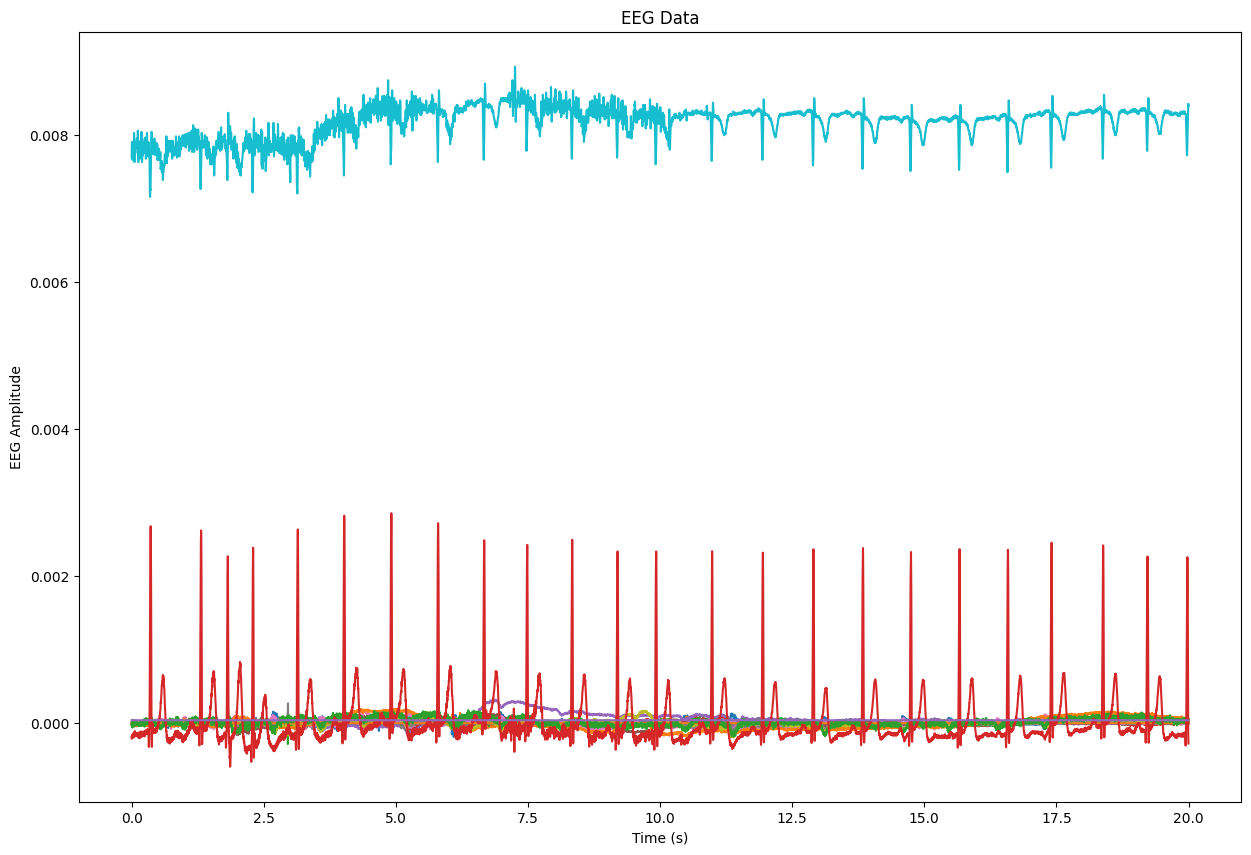

In [137]:
# Plot EEG data
plt.figure(figsize=(15, 10))
plt.plot(times, eeg_data.T)
plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.title('EEG Data')
plt.show()


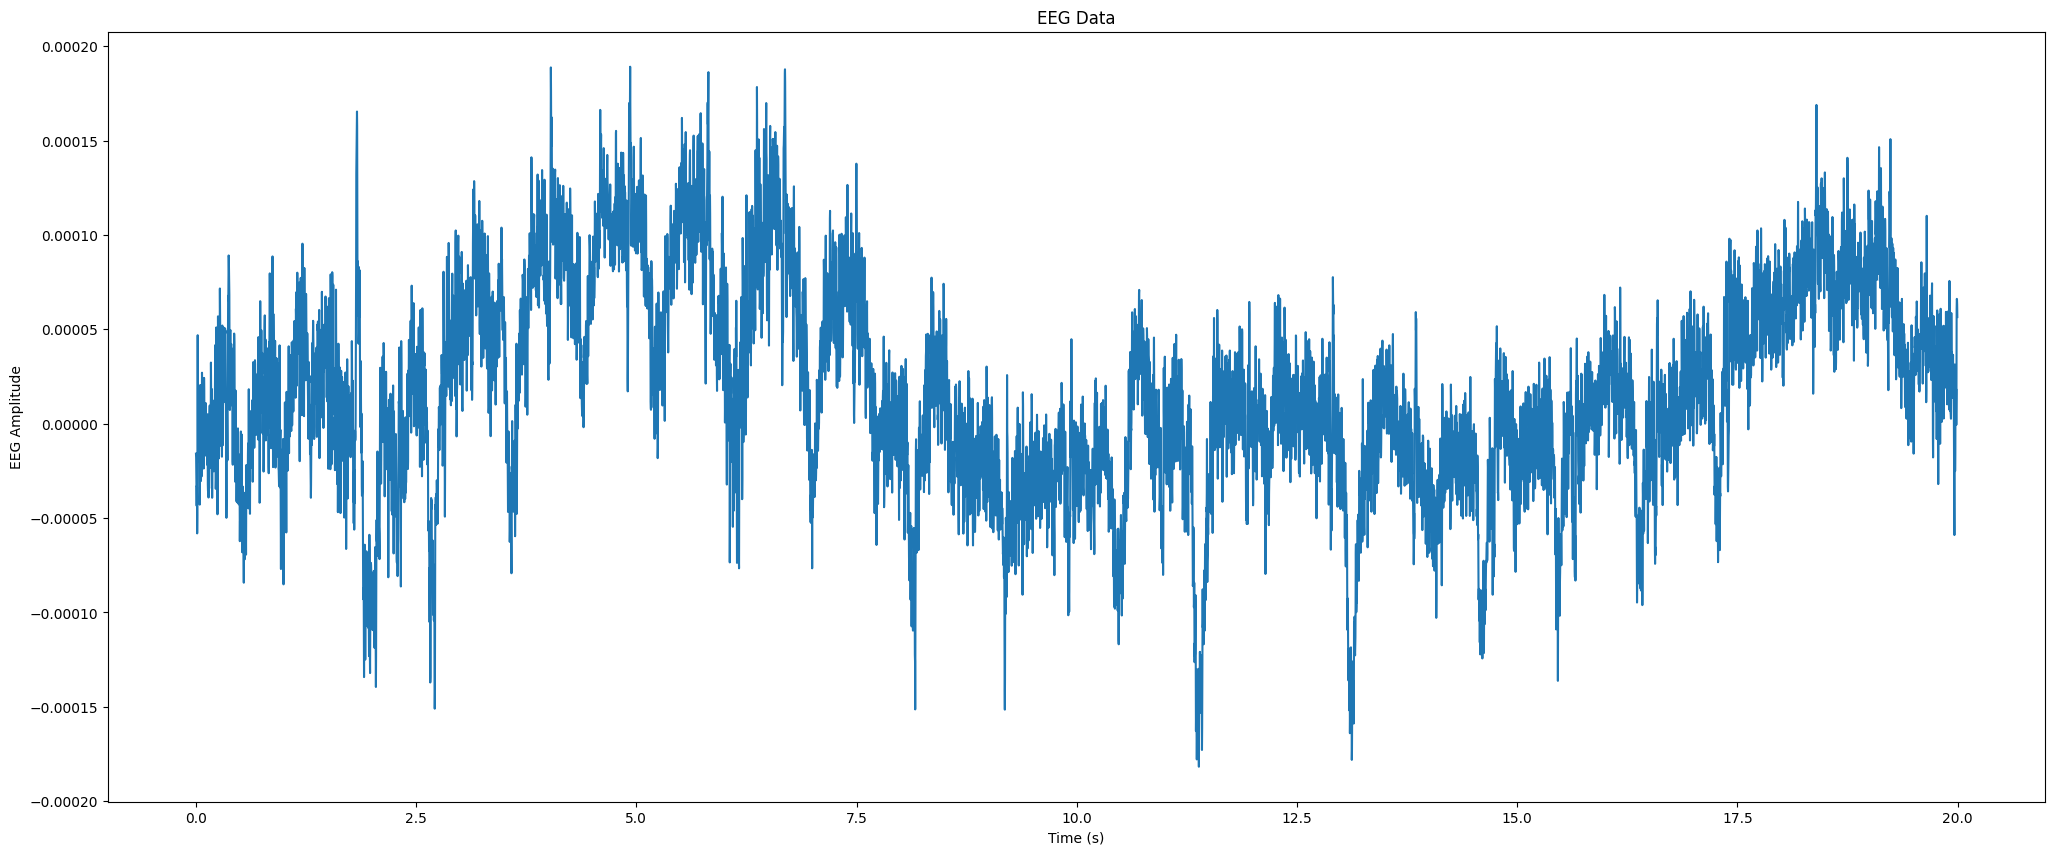

In [138]:
# Plot EEG data
plt.figure(figsize=(25, 10))
plt.plot(times, eeg_data.T[:,32:33])
plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.title('EEG Data')
plt.show()


In [ ]:

# Plot power spectral density
f, Pxx = plt.psd(eeg_data.flatten(), Fs=raw.info['sfreq'])
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power Spectral Density (dB/Hz)')
plt.title('Power Spectral Density')
plt.show()


In [139]:
from mne.filter import filter_data

# Apply band-pass filter
eeg_data_filtered = filter_data(eeg_data, raw.info['sfreq'], l_freq=1.6, h_freq=30.0)

# Re-reference to common average reference (car)
eeg_data_car = eeg_data_filtered - eeg_data_filtered.mean(axis=0)

print('shape of eeg_data_car', eeg_data_car.shape)

Setting up band-pass filter from 1.6 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.60
- Lower transition bandwidth: 1.60 Hz (-6 dB cutoff frequency: 0.80 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1057 samples (2.064 s)

shape of eeg_data_car (35, 10240)


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.0s



## Pre-processing

*   Apply filters (e.g., band-pass, notch filters) to remove noise or unwanted frequencies.

*   Re-reference the EEG data to a common average reference or other reference schemes.

*   Remove or interpolate bad channels.





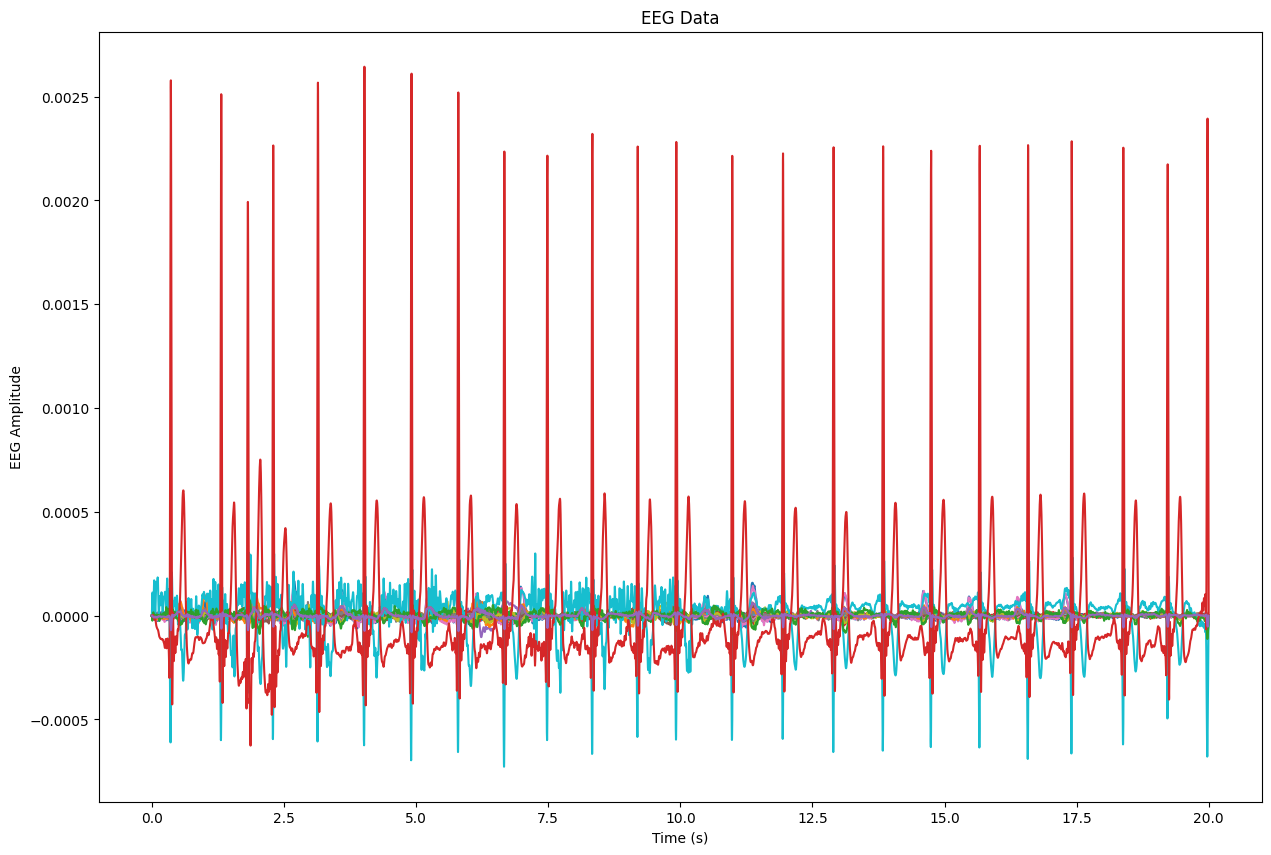

In [140]:
# Plot EEG data
plt.figure(figsize=(15, 10))
plt.plot(times, eeg_data_car.T)
plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.title('EEG Data')
plt.show()


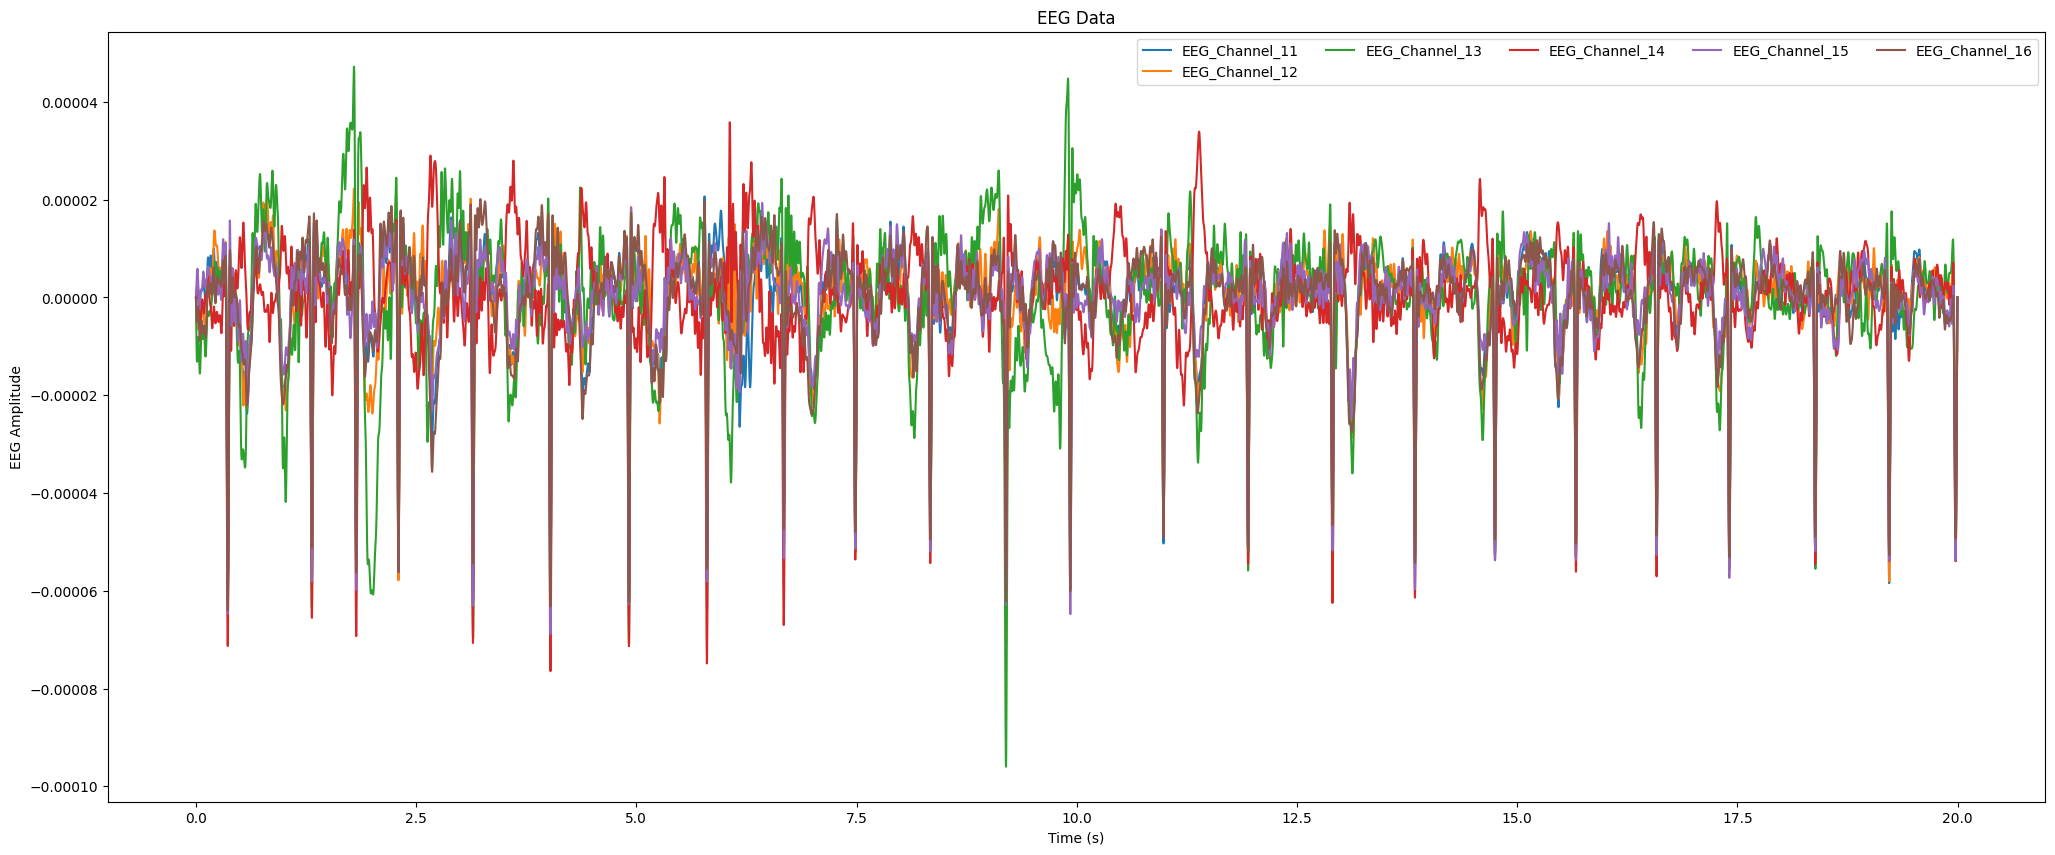

In [152]:
# selected_channels = [2,3]  # Example: channels 0 to 4
selected_channels = list(range(10, 16))  # Channels 10 to 15

# Plot EEG data with legends for each channel
plt.figure(figsize=(25, 10))

for i in selected_channels:
    plt.plot(times, eeg_data_car.T[:, i], label=f'EEG_Channel_{i+1}')

plt.xlabel('Time (s)')
plt.ylabel('EEG Amplitude')
plt.title('EEG Data')
plt.legend(loc='upper right', fontsize='medium', ncol=5)
plt.show()



spike_trains shape:  (10240, 6)

Total number of spikes: 9225.0
----------------------------------------------


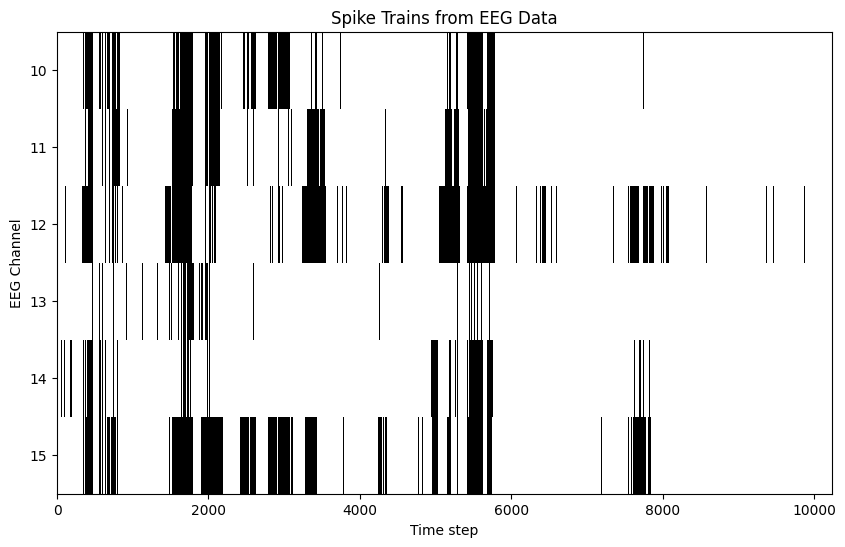

In [160]:
def detect_spikes(eeg_data, threshold):
    spikes = np.zeros_like(eeg_data)
    spikes[eeg_data > threshold] = 1
    return spikes

threshold = 0.00002  # Adjust the threshold as needed
spike_trains = detect_spikes(eeg_data.T[:,selected_channels], threshold)

print('\nspike_trains shape: ', spike_trains.shape)

total_spikes = np.sum(spike_trains)
print(f"\nTotal number of spikes: {total_spikes}")

print('----------------------------------------------')

def plot_spike_trains(spike_trains, title=None):
    # Generate raster plot
    plt.figure(figsize=(10, 6))
    plt.imshow(spike_trains.T, aspect='auto', cmap='binary', interpolation='none')

    plt.xlabel('Time step')
    plt.ylabel('EEG Channel')
    plt.yticks(np.arange(len(selected_channels)), labels=selected_channels)

    plt.title(title if title else 'Spike Trains')

    # plt.colorbar(label='Spike')
    plt.show()

# Assuming spike_trains is the spike trains generated from EEG data
plot_spike_trains(spike_trains, title='Spike Trains from EEG Data')



spike_trains shape:  (10240, 6)

Total number of spikes: 589.0
----------------------------------------------


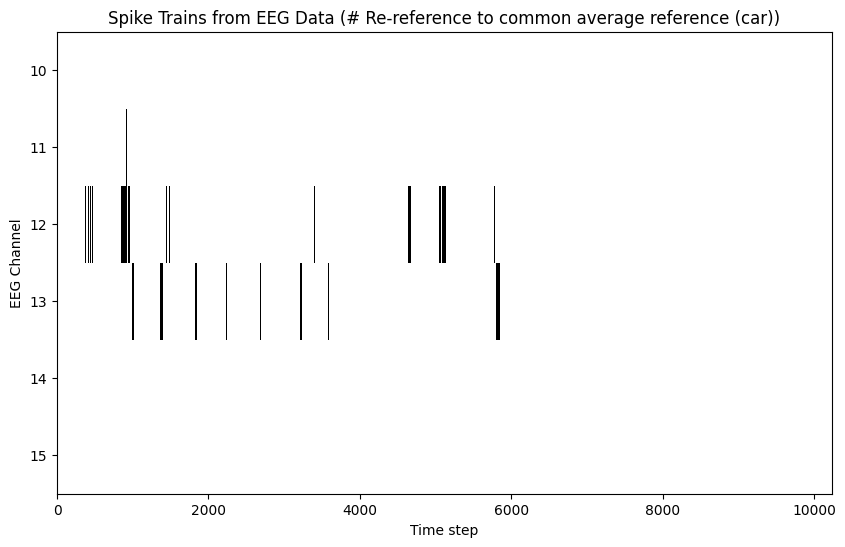

In [159]:
def detect_spikes(eeg_data, threshold):
    spikes = np.zeros_like(eeg_data)
    spikes[eeg_data > threshold] = 1
    return spikes

threshold = 0.00002  # Adjust the threshold as needed
spike_trains = detect_spikes(eeg_data_car.T[:,selected_channels], threshold)

print('\nspike_trains shape: ', spike_trains.shape)

total_spikes = np.sum(spike_trains)
print(f"\nTotal number of spikes: {total_spikes}")

print('----------------------------------------------')

def plot_spike_trains(spike_trains, title=None):
    # Generate raster plot
    plt.figure(figsize=(10, 6))
    plt.imshow(spike_trains.T, aspect='auto', cmap='binary', interpolation='none')

    plt.xlabel('Time step')
    plt.ylabel('EEG Channel')
    plt.yticks(np.arange(len(selected_channels)), labels=selected_channels)

    plt.title(title if title else 'Spike Trains')

    # plt.colorbar(label='Spike')
    plt.show()

# Assuming spike_trains is the spike trains generated from EEG data
plot_spike_trains(spike_trains, title='Spike Trains from EEG Data (# Re-reference to common average reference (car))')


## 1. Detect Peaks in the Filtered EEG Data


In [64]:

# Find peaks in the EEG data
peaks, _ = find_peaks(eeg_data_car[0, :], distance=50)  # Adjust the distance parameter as needed



## 2. Extract Spikes


In [75]:
spike_window = 50  # Define a window around each peak to extract as a spike event
spike_events = [eeg_data_car[0, idx-spike_window:idx+spike_window+1] for idx in peaks]


# Check the shapes of all elements in the spike_events list
shapes = [np.array(event).shape for event in spike_events]

# Print the shapes
print("Shapes of elements in spike_events:", shapes)


Shapes of elements in spike_events: [(0,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,), (101,

## 3. Prepare Spike Trains for SNN


In [79]:

# Define time bins
time_bins = np.linspace(0, 200, 102400)  # Assuming 200 seconds and 102400 samples

# Convert spike events to spike trains
spike_trains = np.zeros((len(spike_events), len(time_bins)))

for idx, spike_event in enumerate(spike_events):
    spike_train_indices = np.logical_and((peaks[idx] - spike_window) <= time_bins, time_bins <= (peaks[idx] + spike_window))
    spike_trains[idx, spike_train_indices] = 1



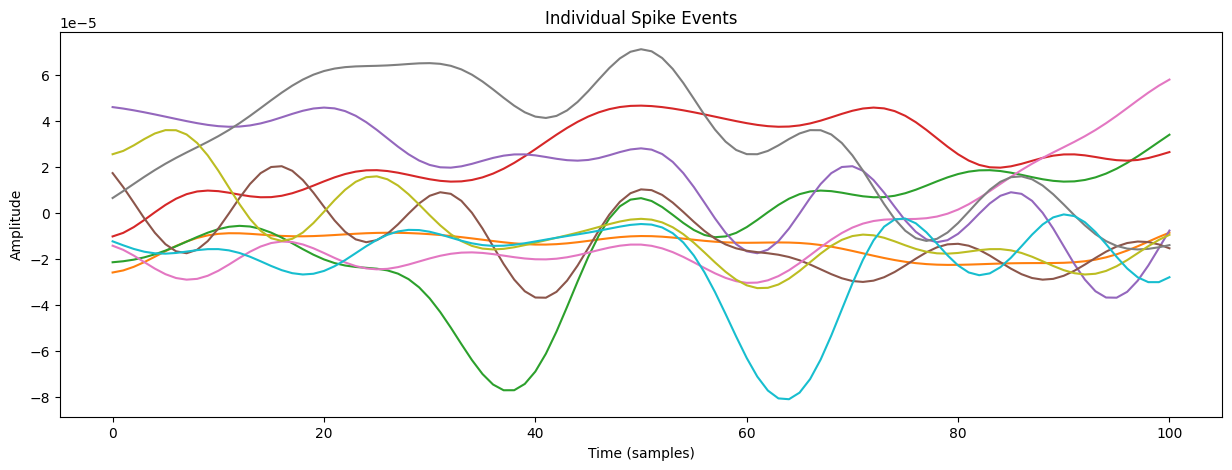

In [80]:
import matplotlib.pyplot as plt

# Plot individual spike events
plt.figure(figsize=(15, 5))
for spike_event in spike_events[:10]:  # Plotting only first 10 spike events for clarity
    plt.plot(spike_event)
plt.title('Individual Spike Events')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


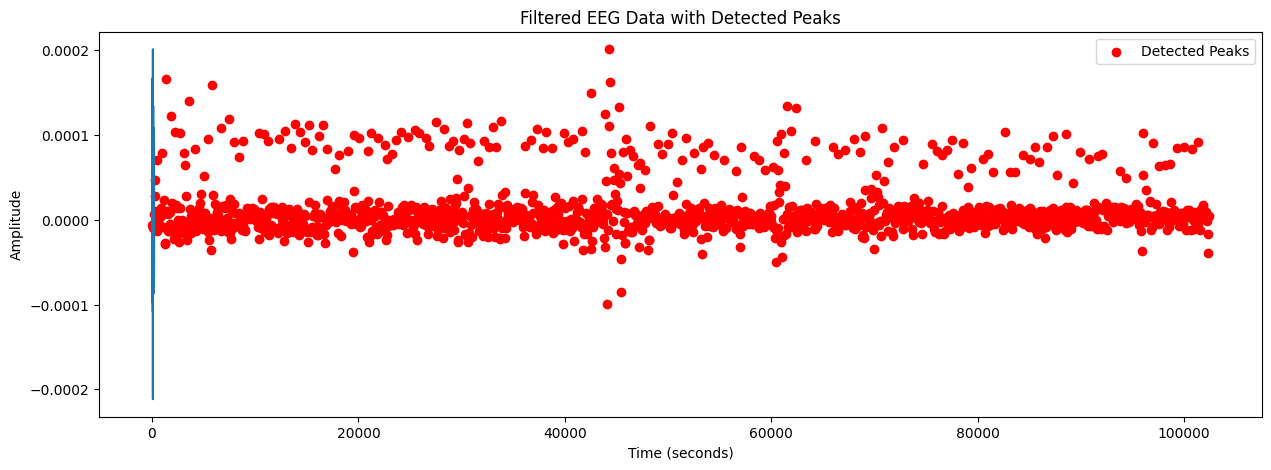

In [82]:
# Plot the filtered EEG data with spike locations
plt.figure(figsize=(15, 5))
plt.plot(time_bins, eeg_data_car[0, :])
plt.scatter(peaks, eeg_data_car[0, peaks], color='red', label='Detected Peaks')
plt.title('Filtered EEG Data with Detected Peaks')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


## 4. Preprocessing


In [ ]:
# Normalize spike trains
spike_trains_normalized = (spike_trains - spike_trains.mean()) / spike_trains.std()


In [ ]:
import matplotlib.pyplot as plt

# Plot individual spike events
plt.figure(figsize=(15, 5))
for spike_event in spike_events[:10]:  # Plotting only first 10 spike events for clarity
    plt.plot(spike_event)
plt.title('Individual Spike Events')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.show()


## Feature Extraction:


*   Extract time-domain features (e.g., mean, variance, skewness, kurtosis).

*   Extract frequency-domain features (e.g., spectral power in specific frequency bands).
*  Extract time-frequency features using methods like wavelet transform or short-time Fourier transform.




In [59]:
# Time-domain features
mean_amp = eeg_data.mean(axis=1)
print('mean_amp shape', mean_amp.shape)
print('mean_amp: ', mean_amp)

variance_amp = eeg_data.var(axis=1)
print('\n variance_amp: ', variance_amp)


# Frequency-domain features
from scipy.signal import welch
f, Pxx = welch(eeg_data.flatten(), fs=raw.info['sfreq'])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


mean_amp:  [8.20768921e-06 6.02145752e-06 3.94856567e-06 4.80355103e-06
 1.07879761e-05 7.01181152e-06 5.09571899e-06 8.99490112e-06
 5.74521729e-06 2.68927612e-06 4.28624023e-06 6.07984741e-06
 6.44392700e-06 6.71969116e-06 3.42926025e-07 5.44706055e-06
 6.70595215e-06 5.70988403e-06 3.65163452e-06 6.71092773e-06
 4.74335571e-06 1.17512988e-05 7.18054932e-06 7.13739380e-06
 7.70910400e-06 9.10486938e-06 6.08534790e-06 4.52994263e-06
 5.93835571e-06 8.38344917e-03 0.00000000e+00 0.00000000e+00
 1.08371411e-05 7.39604614e-06 4.00000000e-05]

 variance_amp:  [2.15100518e-09 1.31997185e-09 1.60881712e-09 2.83083750e-09
 6.94334080e-09 2.59537758e-09 2.50960263e-09 1.31163398e-09
 1.94268261e-09 1.83106606e-09 2.10235257e-09 2.19318189e-09
 2.03963889e-09 1.70281821e-09 2.09752678e-09 2.20218437e-09
 4.66701723e-09 2.07020856e-09 2.37811280e-09 2.19268595e-09
 2.39227168e-09 4.78443205e-09 2.75211338e-09 2.69681918e-09
 2.31926192e-09 1.41177030e-09 2.20865967e-09 2.48205198e-09
 3.1277860

In [61]:
print('mean_amp shape: ', mean_amp.shape)


mean_amp shape:  (35,)


## Event-Related Analysis:


*   Detect and analyze specific events or epochs in the EEG data (e.g., evoked responses, event-related potentials).

*   Perform averaging across trials to improve the signal-to-noise ratio.




In [62]:
# Detect events (e.g., stimulus onsets)
events = mne.find_events(raw)

# Extract epochs around the events
epochs = mne.Epochs(raw, events, tmin=-0.5, tmax=1.0, baseline=None, preload=True)

# Average epochs
evoked = epochs.average()
evoked.plot()


ValueError: No stim channels found. Consider specifying them manually using the 'stim_channel' parameter.

## Advanced Analysis:


*   Perform source localization to estimate the cortical sources of the EEG signals.

*   Analyze connectivity between different EEG channels using measures like coherence or phase-locking value (PLV).




In [ ]:
# Source localization (requires head model and source space)
# Connectivity analysis (requires additional preprocessing and connectivity estimation)
